Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame

autism_dataset = pd.read_csv("asd_data_csv.csv")
#autism_dataset = pd.read_csv("/content/asd_data_csv.csv")

In [3]:
pwd

'c:\\Users\\Md Shahzeb\\OneDrive\\Desktop\\project'

In [4]:
# printing the first 5 rows of the dataset
autism_dataset.head()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
0,3,2,1,1,1,1,1,1,1,1,1,0,0
1,6,3,1,1,1,1,1,1,1,0,1,0,1
2,7,3,1,1,1,1,1,1,1,0,1,0,1
3,1,2,1,1,0,1,1,1,1,0,0,0,1
4,3,2,1,1,0,1,1,1,1,1,0,0,1


In [5]:
# number of rows and Columns in this dataset
autism_dataset.shape

(1961, 13)

In [6]:
# getting the statistical measures of the data
autism_dataset.describe()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,3.083631,9.618052,0.527282,0.535951,0.505354,0.525752,0.525752,0.525752,0.524222,0.272820,0.771545,0.327384,0.538501
std,3.691156,4.301336,0.499382,0.498833,0.500099,0.499464,0.499464,0.499464,0.499540,0.445523,0.419944,0.469378,0.498643
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,5.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import pandas as pd
import numpy as np

# Sample data - replace this with your actual dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Print column names
print("Columns in dataset:", data.columns)

# Print unique values for each column
for column in data.columns:
    print(f"Unique values in '{column}' column:", data[column].unique())


Columns in dataset: Index(['feature1', 'feature2', 'label'], dtype='object')
Unique values in 'feature1' column: [3.51845321e-01 5.53450427e-01 1.63658304e-01 5.72266931e-01
 9.59817541e-01 6.44321157e-01 7.46561513e-01 7.39303258e-01
 8.94768096e-01 3.51546623e-01 5.67543380e-02 6.54094390e-01
 2.06477402e-01 5.00409819e-01 5.12514774e-01 4.13306159e-01
 6.88925002e-01 7.39364555e-01 7.43517455e-01 1.18058029e-01
 5.74646237e-01 2.98019176e-02 3.72811394e-01 6.99779095e-01
 8.23017549e-01 4.92378270e-01 5.74541408e-01 4.93670586e-01
 1.60102796e-01 7.88961938e-01 5.34157280e-01 2.35512204e-01
 5.75477677e-01 7.85526772e-01 9.49619289e-01 3.58929825e-01
 1.84137486e-01 1.37821575e-01 6.72912054e-02 6.19159283e-01
 5.88771432e-02 5.73498995e-04 7.02512677e-01 1.69050640e-01
 4.81367634e-02 7.37851229e-01 3.64998399e-01 3.23700255e-01
 9.86555568e-01 2.25347478e-02 8.27153135e-02 2.94044520e-01
 8.47508668e-01 2.47599012e-02 8.29899093e-01 3.06613895e-01
 1.71673218e-02 2.37000447e-02 5.

In [8]:
autism_dataset['Outcome'].value_counts()

Outcome
1    1056
0     905
Name: count, dtype: int64

0 --> Not with ASD

1 --> With ASD

In [9]:
autism_dataset.groupby('Outcome').mean()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD
Outcome,,,,,,,,,,,,
0,1.942541,9.717127,0.354696,0.367956,0.340331,0.353591,0.352486,0.353591,0.352486,0.469613,0.704972,0.184530
1,4.061553,9.533144,0.675189,0.679924,0.646780,0.673295,0.674242,0.673295,0.671402,0.104167,0.828598,0.449811


In [10]:
# separating the data and labels
X = autism_dataset.drop(columns = 'Outcome', axis=1)
Y = autism_dataset['Outcome']

In [11]:
print(X)

      Social_Responsiveness_Scale  Age_Years  Speech Delay/Language Disorder  \
0                               3          2                               1   
1                               6          3                               1   
2                               7          3                               1   
3                               1          2                               1   
4                               3          2                               1   
...                           ...        ...                             ...   
1956                            1          7                               0   
1957                            0         14                               0   
1958                            1          7                               0   
1959                            0         14                               0   
1960                            1          7                               0   

      Learning disorder  Genetic_Disord

In [12]:
print(Y)

0       0
1       1
2       1
3       1
4       1
       ..
1956    0
1957    0
1958    1
1959    0
1960    1
Name: Outcome, Length: 1961, dtype: int64


Data Standardization

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
standardized_data = scaler.transform(X)

In [16]:
print(standardized_data)

[[-0.02266285 -1.77154153  0.94684654 ...  1.63261158  0.54415114
  -0.69766208]
 [ 0.7902979  -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 [ 1.06128481 -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 ...
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.8356236   1.01900103 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]]


In [17]:
X = standardized_data
Y = autism_dataset['Outcome']

In [18]:
print(X)
print(Y)

[[-0.02266285 -1.77154153  0.94684654 ...  1.63261158  0.54415114
  -0.69766208]
 [ 0.7902979  -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 [ 1.06128481 -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 ...
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.8356236   1.01900103 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]]
0       0
1       1
2       1
3       1
4       1
       ..
1956    0
1957    0
1958    1
1959    0
1960    1
Name: Outcome, Length: 1961, dtype: int64


Train Test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(1961, 12) (1568, 12) (393, 12)


Training the Model

In [21]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [22]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
49/49 [==============================] - 1s 1ms/step - loss: 0.5932 - accuracy: 0.6805
Epoch 2/10
49/49 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7188
Epoch 3/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7136
Epoch 4/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7124
Epoch 5/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7188
Epoch 6/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7194
Epoch 7/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7156
Epoch 8/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7200
Epoch 9/10
49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7111
Epoch 10/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7296


Model Evaluation

Accuracy Score

In [23]:
# accuracy score on the training data
##X_train_prediction = classifier.predict(X_train)
##training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
from sklearn.metrics import accuracy_score

# Predicting the classes
y_pred = (classifier.predict(X_test) > 0.5).astype("int32")

# Calculating accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


13/13 [==============================] - 0s 3ms/step
Accuracy: 74.81%


Making a Predictive System

In [37]:
# input_data = (3,18,1,1,1,1,1,1,2,1,0,1,1)
input_data = (0,4,0,0,0,0,0,0,1,0,1,1,0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped[:, :12])
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not with Autism spectrum disorder')
else:
  print('The person is with Autism spectrum disorder')

c:\Users\Md Shahzeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but StandardScaler is expecting 2 features as input.

In [25]:
import pickle

In [26]:
#pickle.dump(autism_dataset,open("autism_dataset.pkl","wb"))

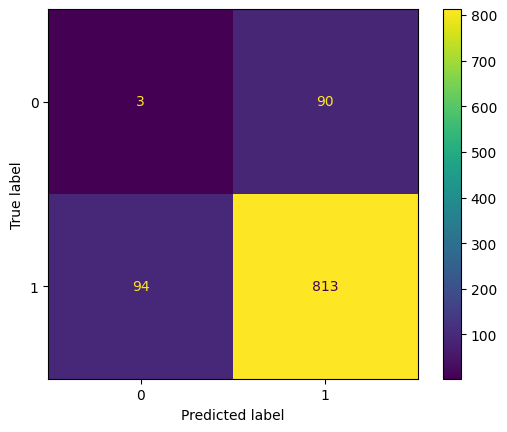

In [27]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

(1961, 12) (1568, 12) (393, 12)
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5875
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.6250
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 0s 0s/step - loss: 0.6726 - accuracy: 0.5750
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5750
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5625
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5625
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.5750
Epoch 10/10
1/1 [==============================] - 0s 136ms/step - loss: 0.7482 - accuracy: 0.4000
Model 

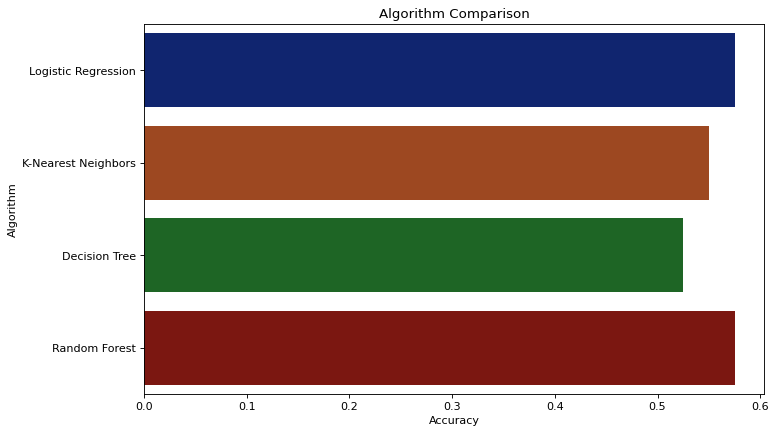

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

autism_dataset = pd.read_csv("asd_data_csv.csv")
print(X.shape, X_train.shape, X_test.shape)


data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build the model
classifier = Sequential() 
classifier.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1])) 
classifier.add(Dense(units=32, activation='relu')) 
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model 
classifier.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model 
accuracy = classifier.evaluate(X_test, y_test)[1] 
print(f"Model accuracy: {accuracy}")
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    results[model_name] = accuracy

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plotting the results
plt.figure(figsize=[10,6],dpi = 80)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='dark')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison')


# Print the best model based on accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"The best model is: {best_model_name}")



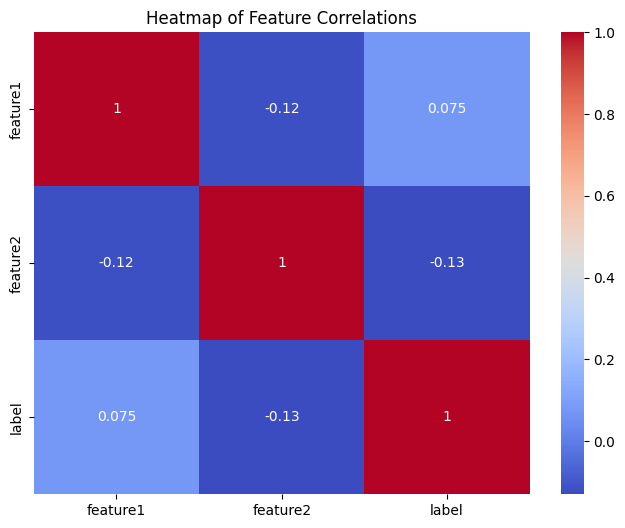

In [29]:
# Generate heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Sample data - replace this with your actual dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model with 2 layers and Dropout
model_2_layers = Sequential()
model_2_layers.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model_2_layers.add(Dropout(0.5))
model_2_layers.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_2_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_2_layers.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
y_pred_prob = model_2_layers.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
map_score = average_precision_score(y_test, y_pred_prob)

print("ANN with 2 layers - Accuracy:", accuracy)
print("ANN with 2 layers - Precision:", precision)
print("ANN with 2 layers - Recall:", recall)
print("ANN with 2 layers - F1 Score:", f1)
print("ANN with 2 layers - Mean Average Precision (MAP):", map_score)


Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5571
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.6143
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5571
Epoch 4/10
3/3 [==============================] - 0s 0s/step - loss: 0.7141 - accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 559us/step - loss: 0.7650 - accuracy: 0.4571
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 0.7316 - accuracy: 0.4571
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5429
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5571
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 0s 33ms/step
ANN with 2 layers - Accuracy: 0.4
ANN with 2 layers - Precision: 0.0
AN

In [31]:
# Build the ANN model with 5 layers and Dropout
model_5_layers = Sequential()
model_5_layers.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model_5_layers.add(Dropout(0.5))
for _ in range(3):
    model_5_layers.add(Dense(units=32, activation='relu'))
    model_5_layers.add(Dropout(0.5))
model_5_layers.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_5_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_5_layers.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
y_pred_prob = model_5_layers.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
map_score = average_precision_score(y_test, y_pred_prob)

print("ANN with 5 layers - Accuracy:", accuracy)
print("ANN with 5 layers - Precision:", precision)
print("ANN with 5 layers - Recall:", recall)
print("ANN with 5 layers - F1 Score:", f1)
print("ANN with 5 layers - Mean Average Precision (MAP):", map_score)


Epoch 1/10
3/3 [==============================] - 1s 2ms/step - loss: 0.7542 - accuracy: 0.4429
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5143
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7248 - accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5429
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5143
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 0s 628us/step - loss: 0.7090 - accuracy: 0.5429
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5571
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.5286
Epoch 10/10
1/1 [==============================] - 0s 50ms/step
ANN with 5 layers - Accuracy: 0.4666666666666667
ANN with 5 layers - P

c:\Users\Md Shahzeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Build the ANN model with 7 layers and Dropout
model_7_layers = Sequential()
model_7_layers.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model_7_layers.add(Dropout(0.5))
for _ in range(5):
    model_7_layers.add(Dense(units=32, activation='relu'))
    model_7_layers.add(Dropout(0.5))
model_7_layers.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_7_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_7_layers.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
y_pred_prob = model_7_layers.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
map_score = average_precision_score(y_test, y_pred_prob)

print("ANN with 7 layers - Accuracy:", accuracy)
print("ANN with 7 layers - Precision:", precision)
print("ANN with 7 layers - Recall:", recall)
print("ANN with 7 layers - F1 Score:", f1)
print("ANN with 7 layers - Mean Average Precision (MAP):", map_score)


Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 0.7553 - accuracy: 0.5571
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.4714
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.4429
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5143
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.5571
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.5143
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.4571
Epoch 8/10
3/3 [==============================] - 0s 0s/step - loss: 0.7034 - accuracy: 0.4714
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 0s 64ms/step
ANN with 7 layers - Accuracy: 0.4666666666666667
ANN with 7 layers - Prec

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, average_precision_score

# Sample data - replace this with your actual dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.rand(100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Average Precision (MAP)
# Note: MAP is typically used for ranking problems and is not straightforward for regression
# For the sake of demonstration, we'll calculate precision at different thresholds
# Assuming y_test and y_pred are binary labels for this example
# y_test_binary = (y_test > threshold).astype(int)
# y_pred_binary = (y_pred > threshold).astype(int)
# map_score = average_precision_score(y_test_binary, y_pred_binary)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Average Precision (MAP): {map_score}")


Mean Squared Error (MSE): 0.1260178327685944
Root Mean Squared Error (RMSE): 0.3549899051643503


C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\3791702238.py:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\3791702238.py:51: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\3791702238.py:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for 

1/1 [==============================] - 0s 198ms/step


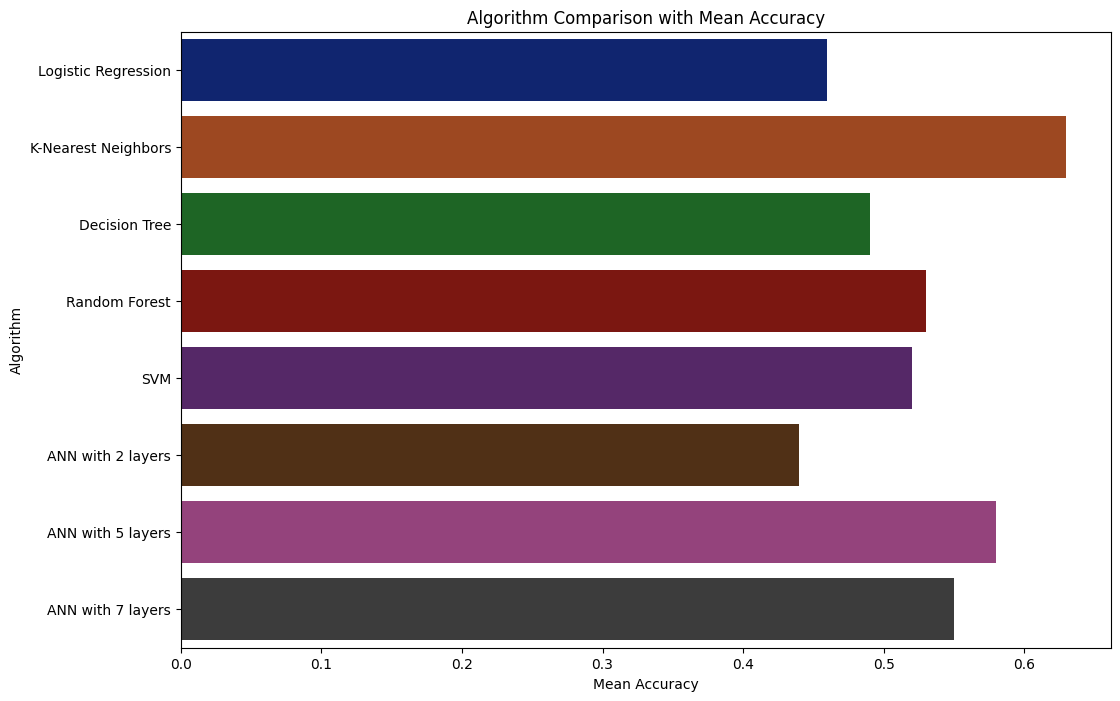

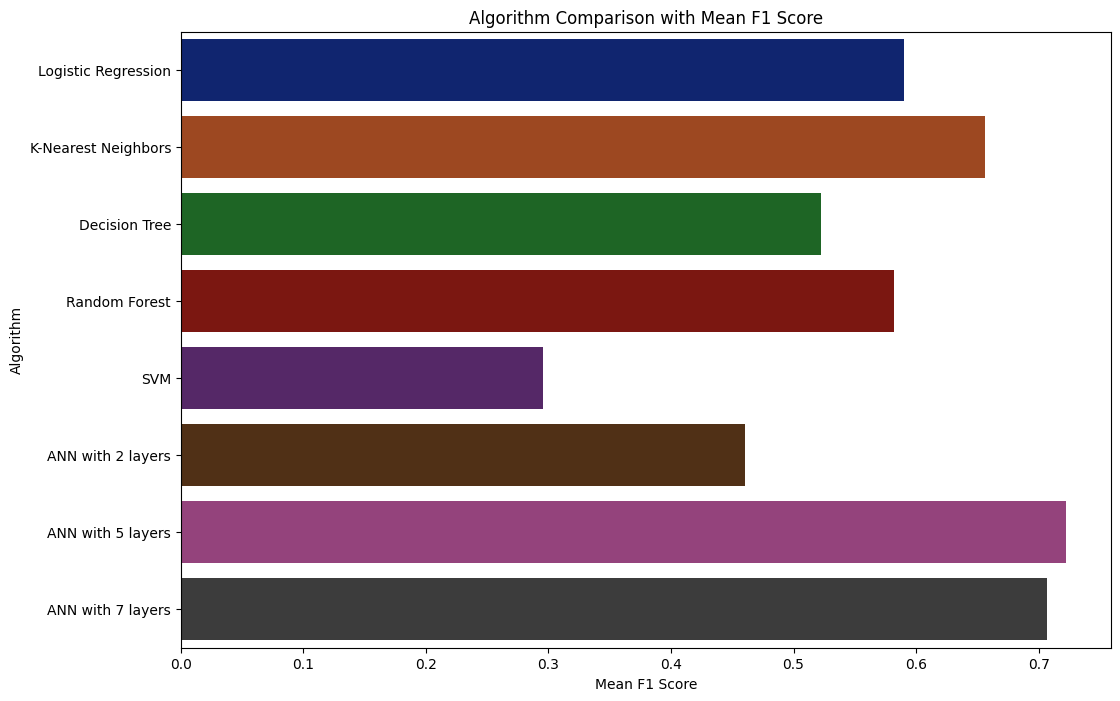

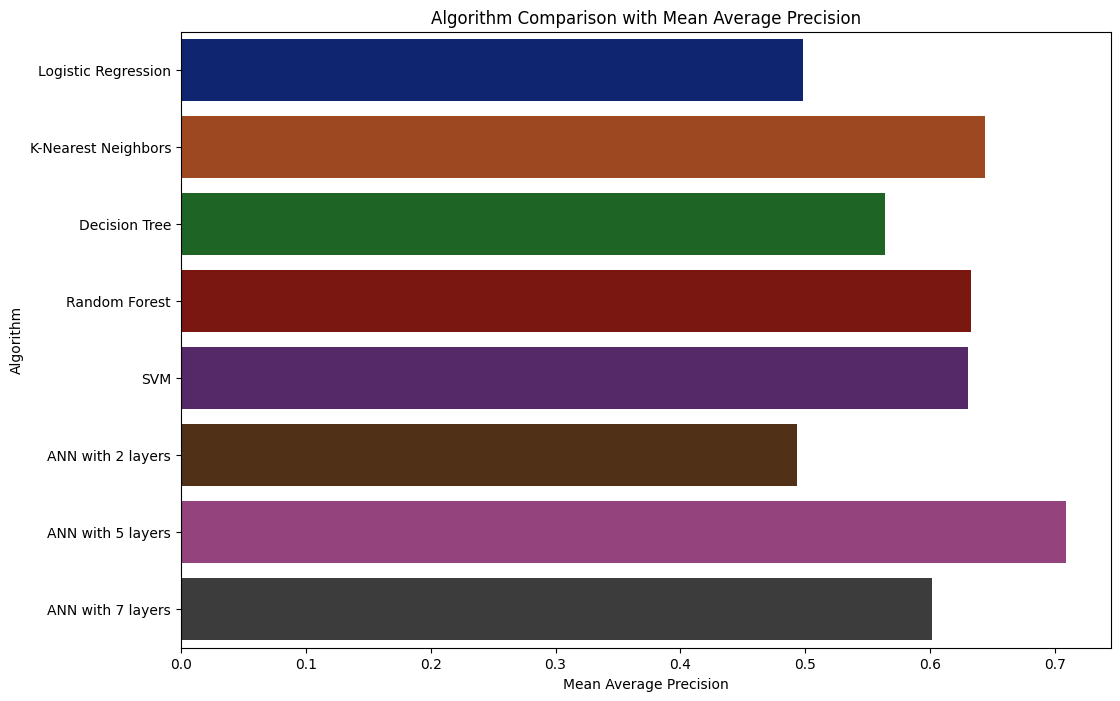

The best model based on mean accuracy is: K-Nearest Neighbors
The best model based on mean F1 score is: ANN with 5 layers
The best model based on mean MAP is: ANN with 5 layers


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Sample data - replace with your dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Function to create ANN models with varying layers
def create_ann(layers):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X.shape[1]))
    for _ in range(layers - 1):
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
    'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
    'ANN with 7 layers': KerasClassifier(build_fn=lambda: create_ann(7), epochs=10, batch_size=32, verbose=0)
}

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation and collect results
results = {}
for model_name, model in models.items():
    accuracies, precisions, recalls, f1s, maps = [], [], [], [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int) if hasattr(model, "predict_proba") else model.predict(X_test)
        
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        maps.append(average_precision_score(y_test, y_pred_prob))
    
    results[model_name] = {
        'mean_accuracy': np.mean(accuracies),
        'mean_precision': np.mean(precisions),
        'mean_recall': np.mean(recalls),
        'mean_f1_score': np.mean(f1s),
        'mean_average_precision': np.mean(maps)
    }

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['mean_accuracy'], y=results_df.index, palette='dark')
plt.xlabel('Mean Accuracy')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Mean Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['mean_f1_score'], y=results_df.index, palette='dark')
plt.xlabel('Mean F1 Score')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Mean F1 Score')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['mean_average_precision'], y=results_df.index, palette='dark')
plt.xlabel('Mean Average Precision')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Mean Average Precision')
plt.show()

# Print the best model based on mean metrics
best_model_accuracy = results_df['mean_accuracy'].idxmax()
best_model_f1 = results_df['mean_f1_score'].idxmax()
best_model_map = results_df['mean_average_precision'].idxmax()
print(f"The best model based on mean accuracy is: {best_model_accuracy}")
print(f"The best model based on mean F1 score is: {best_model_f1}")
print(f"The best model based on mean MAP is: {best_model_map}")


C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\1745920143.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\1745920143.py:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\1745920143.py:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for 

1/1 [==============================] - 0s 95ms/step


c:\Users\Md Shahzeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


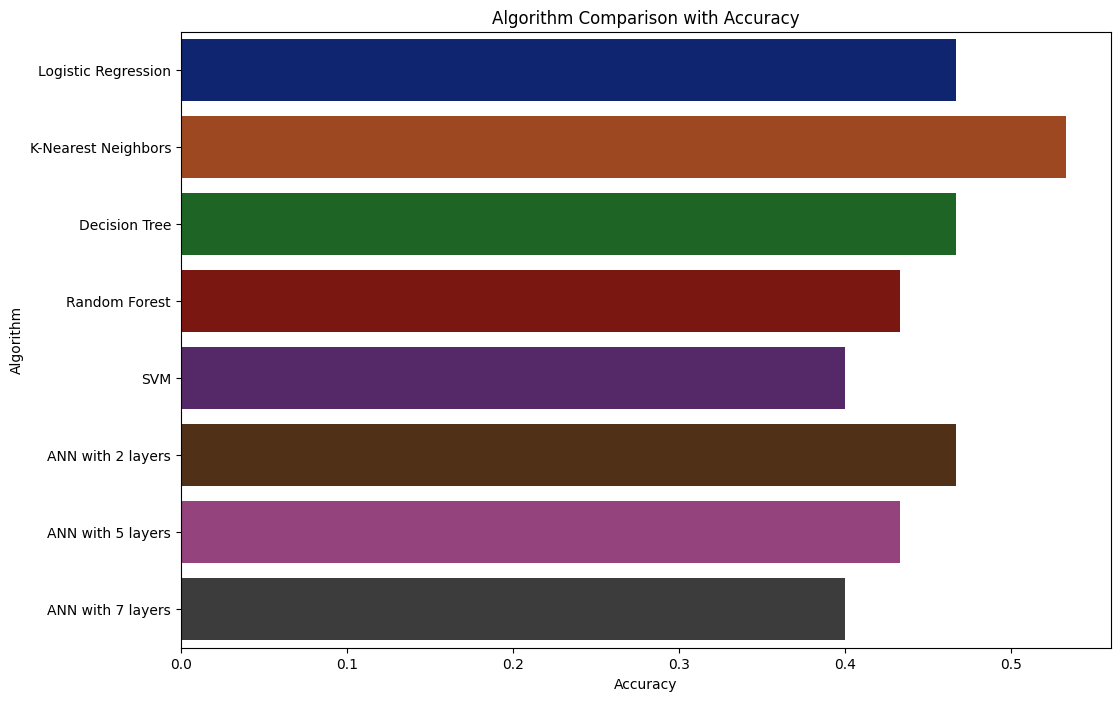

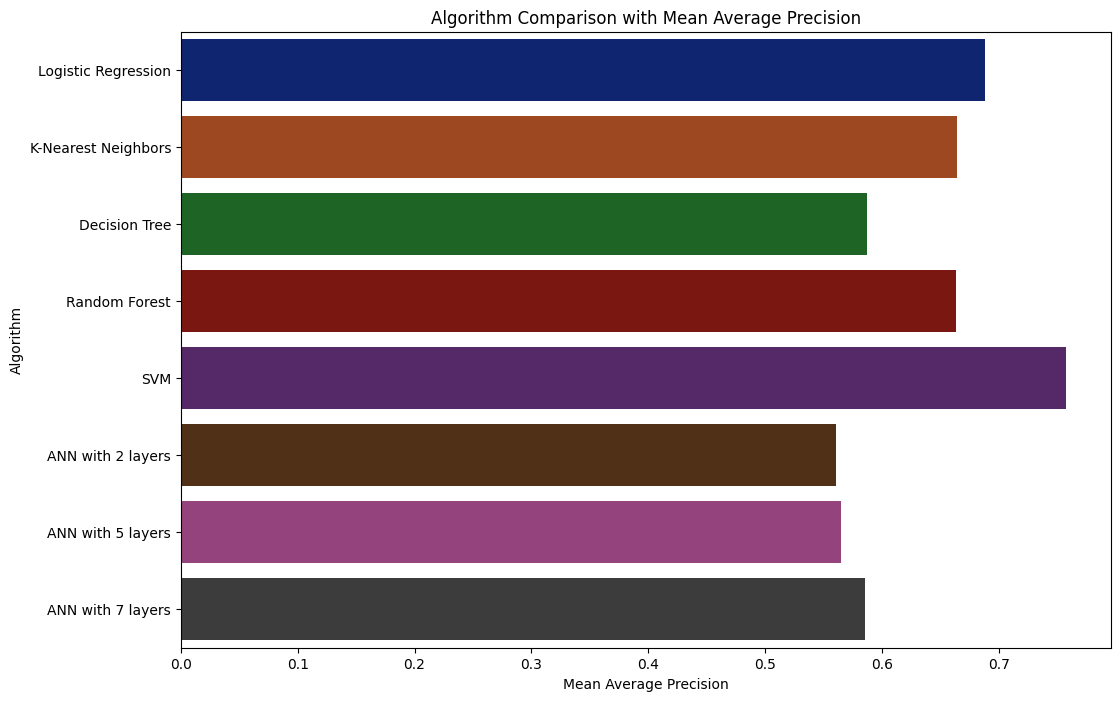

The best model based on accuracy is: K-Nearest Neighbors
The best model based on MAP is: SVM


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Sample data - replace with your dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create ANN models with varying layers
def create_ann(layers):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
    for _ in range(layers - 1):
        model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
    'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
    'ANN with 7 layers': KerasClassifier(build_fn=lambda: create_ann(7), epochs=10, batch_size=32, verbose=0)
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32") if hasattr(model, "predict_proba") else model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    map_score = average_precision_score(y_test, y_pred_prob)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'mean_average_precision': map_score
    }

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['accuracy'], y=results_df.index, palette='dark')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['mean_average_precision'], y=results_df.index, palette='dark')
plt.xlabel('Mean Average Precision')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Mean Average Precision')
plt.show()

# Print the best model based on accuracy and MAP
best_model_accuracy = results_df['accuracy'].idxmax()
best_model_map = results_df['mean_average_precision'].idxmax()
print(f"The best model based on accuracy is: {best_model_accuracy}")
print(f"The best model based on MAP is: {best_model_map}")


C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\85304663.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\85304663.py:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
C:\Users\Md Shahzeb\AppData\Local\Temp\ipykernel_11568\85304663.py:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help m

1/1 [==============================] - 0s 161ms/step


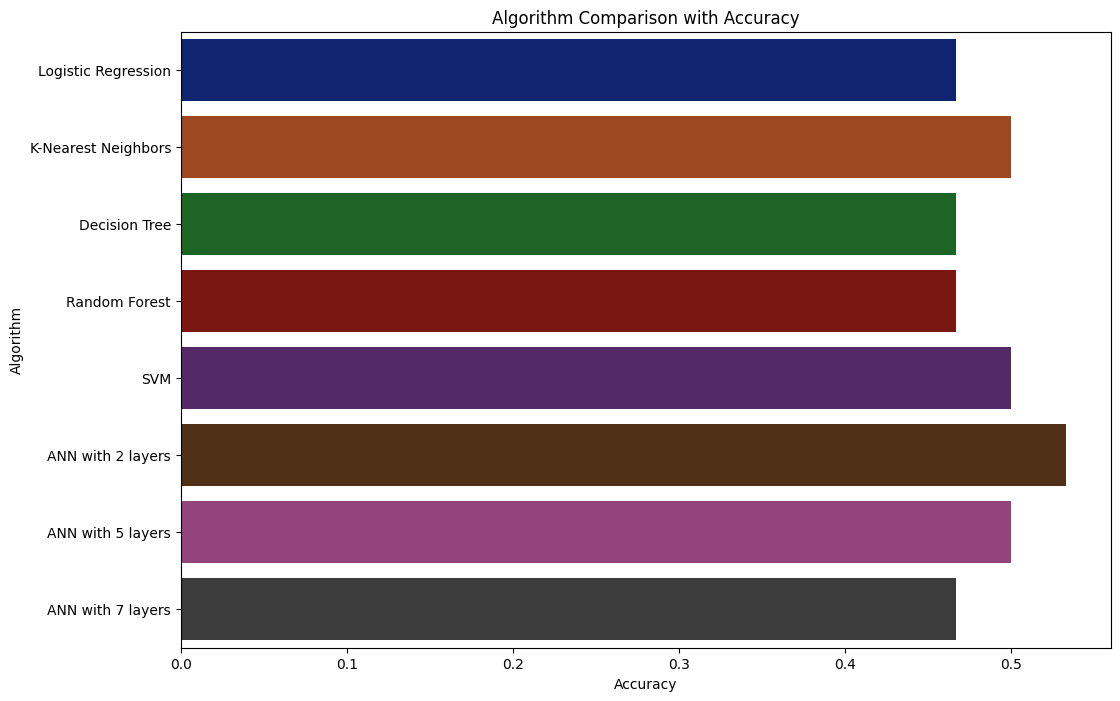

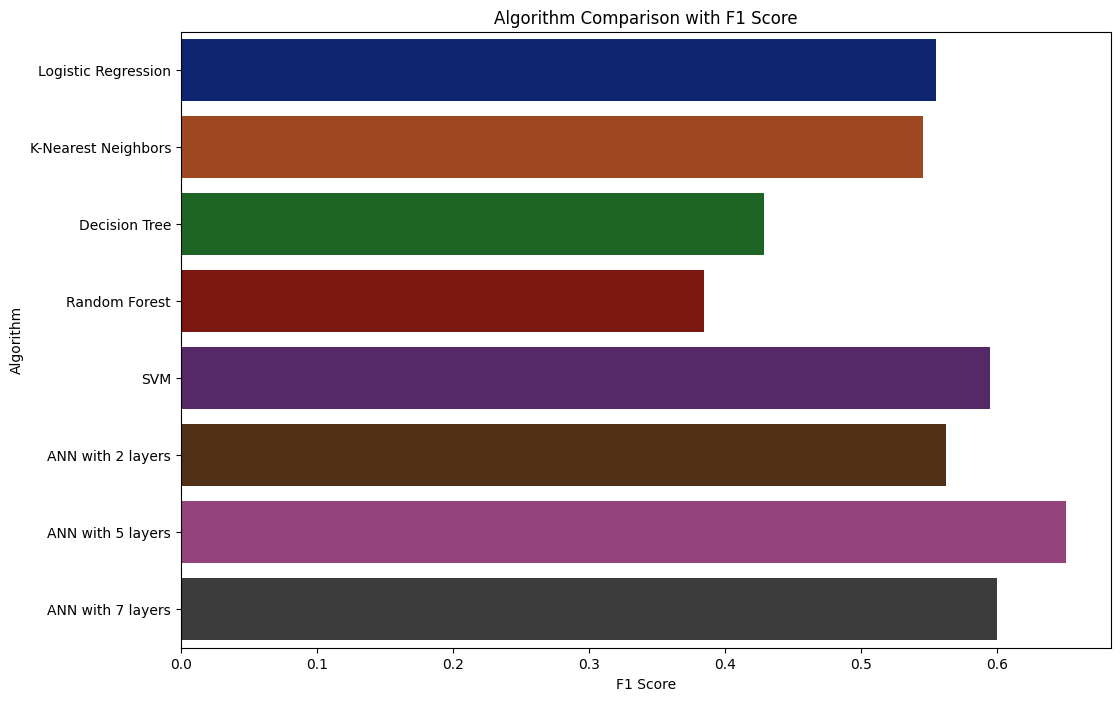

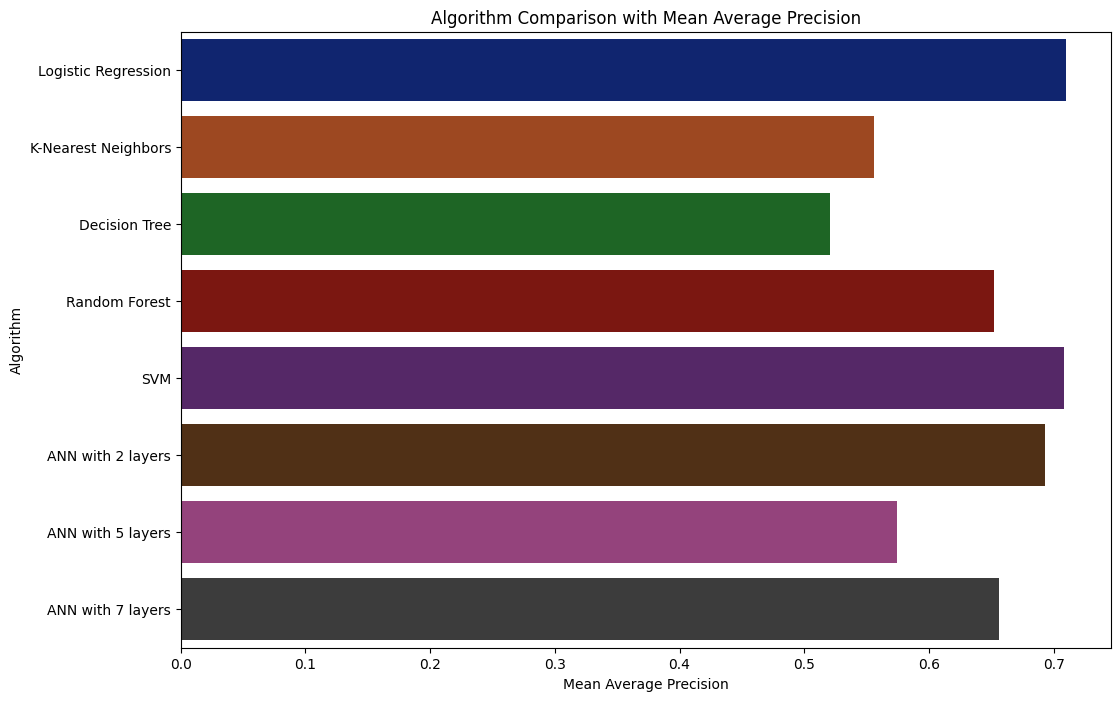

The best model based on accuracy is: ANN with 2 layers
The best model based on F1 score is: ANN with 5 layers
The best model based on MAP is: Logistic Regression


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Sample data - replace with your dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create ANN models with varying layers
def create_ann(layers):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
    for _ in range(layers - 1):
        model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'ANN with 2 layers': KerasClassifier(build_fn=lambda: create_ann(2), epochs=10, batch_size=32, verbose=0),
    'ANN with 5 layers': KerasClassifier(build_fn=lambda: create_ann(5), epochs=10, batch_size=32, verbose=0),
    'ANN with 7 layers': KerasClassifier(build_fn=lambda: create_ann(7), epochs=10, batch_size=32, verbose=0)
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32") if hasattr(model, "predict_proba") else model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    map_score = average_precision_score(y_test, y_pred_prob)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'mean_average_precision': map_score
    }

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['accuracy'], y=results_df.index, palette='dark')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['f1_score'], y=results_df.index, palette='dark')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with F1 Score')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=results_df['mean_average_precision'], y=results_df.index, palette='dark')
plt.xlabel('Mean Average Precision')
plt.ylabel('Algorithm')
plt.title('Algorithm Comparison with Mean Average Precision')
plt.show()

# Print the best model based on accuracy, F1 score, and MAP
best_model_accuracy = results_df['accuracy'].idxmax()
best_model_f1 = results_df['f1_score'].idxmax()
best_model_map = results_df['mean_average_precision'].idxmax()
print(f"The best model based on accuracy is: {best_model_accuracy}")
print(f"The best model based on F1 score is: {best_model_f1}")
print(f"The best model based on MAP is: {best_model_map}")
